#Olist EDA



####Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Datasets load


In [2]:
orders = pd.read_csv("olist_orders_dataset.csv", parse_dates=[
    "order_approved_at",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
])

payments = pd.read_csv("olist_order_payments_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")


####General view

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [12]:
orders.isna().mean().sort_values(ascending=False)
#Some date fields contain missing values, mainly for orders that were cancelled or not delivered.



,0
order_delivered_customer_date,0.029817
order_delivered_carrier_date,0.017930
order_approved_at,0.001609
order_id,0.000000
order_purchase_timestamp,0.000000
order_status,0.000000
customer_id,0.000000
order_estimated_delivery_date,0.000000


####Basic KPI's


In [19]:
#Total orders & revenue
total_orders = orders["order_id"].nunique()
total_revenue = payments["payment_value"].sum()
print(f"Total orders: {total_orders}")
print(f"Total revenue in Euros: {total_revenue_euros:.2f} EUR")

Total orders: 99441
Total revenue in Euros: 16008872.12 EUR


In [20]:
#Revenue per order
order_revenue = payments.groupby("order_id")["payment_value"].sum()
order_revenue.describe()


,payment_value
count,99440.000000
mean,160.990267
std,221.951257
min,0.000000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


####Customers analysis

In [24]:
#Revenue per customer
customer_revenue = (
    orders.merge(payments, on="order_id")
          .merge(customers, on="customer_id")
          .groupby("customer_unique_id")["payment_value"]
          .sum()
)

customer_revenue.describe()

#Revenue distribution is highly skewed: a small percentage of customers generates a large share of total revenue.

,payment_value
count,96095.000000
mean,166.594226
std,231.428912
min,0.000000
25%,63.120000
50%,108.000000
75%,183.530000
max,13664.080000


In [25]:
#Top 10 customers
customer_revenue.sort_values(ascending=False).head(10)


,payment_value
customer_unique_id,
0a0a92112bd4c708ca5fde585afaa872,13664.08
46450c74a0d8c5ca9395da1daac6c120,9553.02
da122df9eeddfedc1dc1f5349a1a690c,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,7274.88
dc4802a71eae9be1dd28f5d788ceb526,6929.31
459bef486812aa25204be022145caa62,6922.21
ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
4007669dec559734d6f53e029e360987,6081.54
5d0a2980b292d049061542014e8960bf,4809.44


####Products & categories

In [27]:
#Revenue by product category
category_revenue = (
    orders.merge(items, on="order_id")
          .merge(products, on="product_id")
          .merge(payments, on="order_id")
          .groupby("product_category_name")["payment_value"]
          .sum()
          .sort_values(ascending=False)
)


In [28]:
category_revenue.head(10)


,payment_value
product_category_name,
cama_mesa_banho,1712553.67
beleza_saude,1657373.12
informatica_acessorios,1585330.45
moveis_decoracao,1430176.39
relogios_presentes,1429216.68
esporte_lazer,1392127.56
utilidades_domesticas,1094758.13
automotivo,852294.33
ferramentas_jardim,838280.75


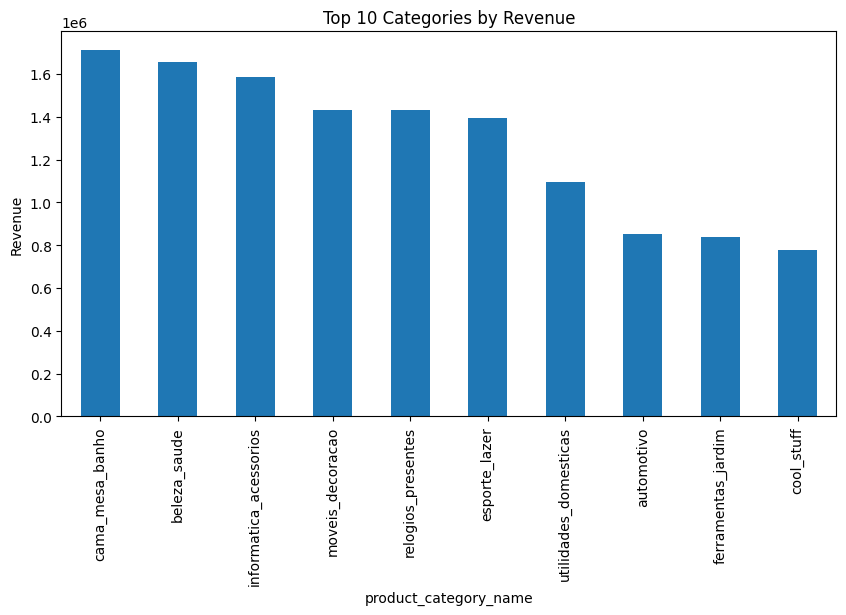

In [29]:
category_revenue.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Categories by Revenue")
plt.ylabel("Revenue")
plt.show()


####Delivery & experience

In [32]:
#Delivery time
delivered_orders = orders[
    (orders["order_status"] == "delivered") &
    (orders["order_delivered_customer_date"].notna())
].copy()

delivered_orders["delivery_days"] = (
    delivered_orders["order_delivered_customer_date"] -
    delivered_orders["order_approved_at"]
).dt.days

delivered_orders["delivery_days"].describe()

,delivery_days
count,96456.000000
mean,11.642459
std,9.520355
min,-7.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,208.000000


In [33]:
#Late vs On-time orders
delivered_orders["delivery_status"] = np.where(
    delivered_orders["order_delivered_customer_date"] >
    delivered_orders["order_estimated_delivery_date"],
    "Late",
    "On Time"
)

In [34]:
delivered_orders["delivery_status"].value_counts(normalize=True) * 100


,proportion
delivery_status,
On Time,91.887633
Late,8.112367


In [35]:
#Impact on review score
orders_reviews = delivered_orders.merge(reviews, on="order_id")
orders_reviews.groupby("delivery_status")["review_score"].mean()


,review_score
delivery_status,
Late,2.566494
On Time,4.293718


####Conclusions
In this exploratory data analysis, we examined the Olist marketplace dataset to better understand its sales dynamics, customer behavior, product performance, and delivery experience.

The analysis shows that revenue is not evenly distributed across customers or product categories, with a relatively small group of customers and categories accounting for a large share of total sales. This highlights the importance of customer retention and category-level prioritization in driving business performance.

From an operational perspective, delivery performance plays a key role in customer satisfaction. Orders delivered after the estimated date tend to receive lower review scores, suggesting that logistics efficiency has a direct impact on user experience.

Overall, this EDA provides a solid overview of Olist’s business fundamentals and serves as a useful foundation for further analysis or dashboarding, focusing on descriptive insights rather than predictive modeling.